In [43]:
import nltk
from __future__ import division
from nltk import word_tokenize
import numpy as np
from nltk.corpus import stopwords

f=open('/home/p_lawhatre/Desktop/assignment_nlp/shkspr.txt').read()

#tokenized list
t_m=word_tokenize(f)

#type
type=len(set(t_m))

#token
token=len(t_m)

#TTR
ttr=type/token
print '\033[1m'+'BEFORE REMOVING STOPWORDS'
print '\033[1m'+'type:'
print '\t', type
print '\033[1m'+'token:'
print '\t', token
print'\033[1m'+'ttr:'
print '\t', ttr

#stopwords
stop_words = set(stopwords.words('english'))
t_main= [w for w in t_m if not w in stop_words]

t_main = []

for w in t_m:
    if w not in stop_words:
        t_main.append(w)
 
#type
type=len(set(t_main))

#token
token=len(t_main)

#TTR
ttr=type/token
print '\n'
print '\033[1m'+'AFTER REMOVING STOPWORDS'
print '\033[1m'+'type:'
print '\t', type
print '\033[1m'+'token:'
print '\t', token
print'\033[1m'+'ttr:'
print '\t', ttr

BEFORE REMOVING STOPWORDS
type:
	35615
token:
	1131197
ttr:
	0.031484347996


AFTER REMOVING STOPWORDS
type:
	35479
token:
	803937
ttr:
	0.0441315675233


Zipf's Law:frequency vs rank


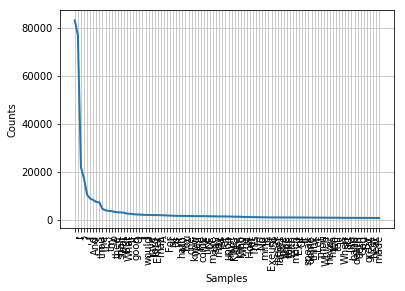

In [44]:
#plotting Zipf law(frequency vs rank)
fd=nltk.FreqDist(t_main)
print('\033[1m'+'''Zipf's Law:frequency vs rank''')
fd.plot(100,cumulative=False)


Zipf's Law:meaning vs frequency


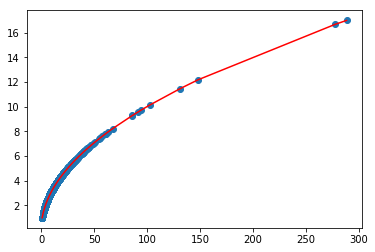

In [45]:
#plotting Zipf law(meaning vs frequency)
import numpy as np
import matplotlib.pyplot as plt
q=fd.items()
ct=0;
u=[];
v=[];
for i in q:
    uu,vv=q[ct]
    ct=ct+1
    u.append(uu)
    v.append(np.sqrt(vv))
srt=(np.argsort(v));
v=np.sort(v)
m=np.sqrt(v);
print('\033[1m'+'''Zipf's Law:meaning vs frequency''')
plt.scatter(v,m)
plt.plot(v,m,'r-')


Zipf's Law:length vs frequency


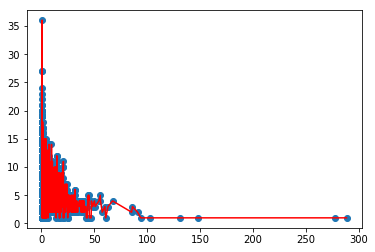

In [46]:
#plotting Zipf law(length vs frequency)
w=[];
for si in srt:
    w.append(len(u[si]))
print('\033[1m'+'''Zipf's Law:length vs frequency''')
plt.scatter(v,w)
plt.plot(v,w,'r-')

Problem:Zipf's law is weak at lower and higher frquencies


Text(0,0.5,'rank')

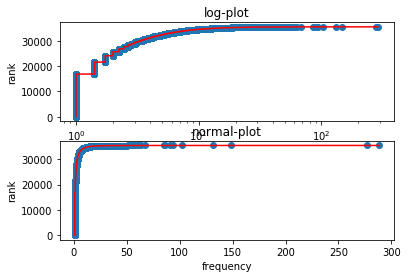

In [47]:
#Problem of zipf's law
print('\033[1m'+'''Problem:Zipf's law is weak at lower and higher frquencies''')
plt.subplot(211)
plt.xscale('log')
plt.scatter(v,range(len(v)))
plt.plot(v,range(len(v)),'r-')
plt.title('log-plot')
plt.xlabel('log(frequency)')
plt.ylabel('rank')
plt.subplot(212)
plt.scatter(v,range(len(v)))
plt.plot(v,range(len(v)),'r-')
plt.title('normal-plot')
plt.xlabel('frequency')
plt.ylabel('rank')

Beta:
	0.6295803061573704
K:
	34.95936896367984


	Heaps law


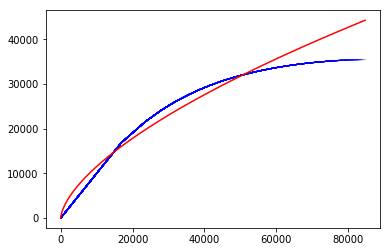

In [48]:
#parameter approximation (Heaps's law)
h1=range(1,len(u)+1,1)
h2=[];
s=0;
for hi in v:
    s=s+hi
    h2.append(s)
plt.scatter(h2,h1,0.02,facecolors='none', edgecolors='b')
#estimation
from scipy.optimize import *
def f(x,beta,K):
    return K*(x**beta)
params,extras=curve_fit(f,h2,h1)
beta=params[0]
K=params[1]
plt.plot(h2,K*(h2**beta),'r')
print('\033[1m'+'''Beta:''')
print '\t',beta
print('\033[1m'+'''K:''')
print '\t',K
print '\n'
print('\033[1m'+'\t'+'''Heaps law''')